# Sales Forecasting for Small Basket


## Data Exploration and Visualization 

# Loading important libraries 

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
color = sns.color_palette()

import warnings
warnings.filterwarnings("ignore")

# Loading the data 

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/FinalHack Datasets/train.csv", parse_dates = ['date'])

train_transactions = pd.read_excel("/content/drive/MyDrive/FinalHack Datasets/train_transactions.xlsx")

location_details = pd.read_excel("/content/drive/MyDrive/FinalHack Datasets/location_details.xlsx")

item_details = pd.read_excel("/content/drive/MyDrive/FinalHack Datasets/item_details.xlsx")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101688779 entries, 0 to 101688778
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   locationId   object        
 2   item_id      object        
 3   unit_sales   float64       
 4   onpromotion  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 3.8+ GB


Since one of the data set is large in size will be trying to reduce the memory usage by converting features into their appropiate datatypes. 

In [ ]:
## Converting Datatypes
train.locationId = train.locationId.astype('category')
train.item_id = train.item_id.astype('category')
train.unit_sales = train.unit_sales.astype('float32')
train.onpromotion = train.onpromotion.astype('category')


In [ ]:
train.isnull().sum()

date                  0
locationId            0
item_id               0
unit_sales            0
onpromotion    21657651
dtype: int64

In [ ]:
print(train.onpromotion. value_counts())

False    74970155
True      5060973
Name: onpromotion, dtype: int64


In [ ]:
## Filling missing values in 'onpromotion column. 

train['onpromotion'].fillna(False,inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101688779 entries, 0 to 101688778
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   locationId   category      
 2   item_id      category      
 3   unit_sales   float32       
 4   onpromotion  category      
dtypes: category(3), datetime64[ns](1), float32(1)
memory usage: 1.5 GB


#Now we reduced our memory usage from 3.8+ GB to 1.5 GB

In [ ]:
train.head()

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,False
1,2015-01-01,location_25,item_105574,1.0,False
2,2015-01-01,location_25,item_105575,2.0,False
3,2015-01-01,location_25,item_108079,1.0,False
4,2015-01-01,location_25,item_108701,1.0,False


In [ ]:
train.tail()

,date,locationId,item_id,unit_sales,onpromotion
101688774,2018-12-31,location_54,item_2048381,6.0,True
101688775,2018-12-31,location_54,item_2048421,4.0,False
101688776,2018-12-31,location_54,item_2048471,10.0,False
101688777,2018-12-31,location_54,item_2048515,3.0,False
101688778,2018-12-31,location_54,item_2048674,1.0,False


In [ ]:
train.shape

(101688779, 5)

# Dropping duplicates may results to loosing important data

In [ ]:
#train.duplicated().sum()


In [ ]:
#train.drop_duplicates(inplace=True)

# Exploring "train_transactions", "items_details" and "location_details".

### Train transacrions

In [ ]:
train_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71391 entries, 0 to 71390
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 71391 non-null  datetime64[ns]
 1   location_identifier  71391 non-null  object        
 2   transactions         71391 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
# Converting Datatype
train_transactions.location_identifier = train_transactions.location_identifier.astype('category')

In [ ]:
train_transactions.head()

,date,location_identifier,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358
3,2015-01-02,location_3,3487
4,2015-01-02,location_4,1922


### Item Details

In [ ]:
item_details.head()

,item_id,category_of_item,class,perishable
0,item_96995,grocery_items,class_1093,0
1,item_99197,grocery_items,class_1067,0
2,item_103501,cleaning_utilities,class_3008,0
3,item_103520,grocery_items,class_1028,0
4,item_103665,baked_items / bread_based,class_2712,1


In [ ]:
# Number of Unique Items/Products in Item Dataset

print(item_details['item_id'].nunique())

4100


Total unique number of product/item sold by the company is - 4100

#### Top item/product category.

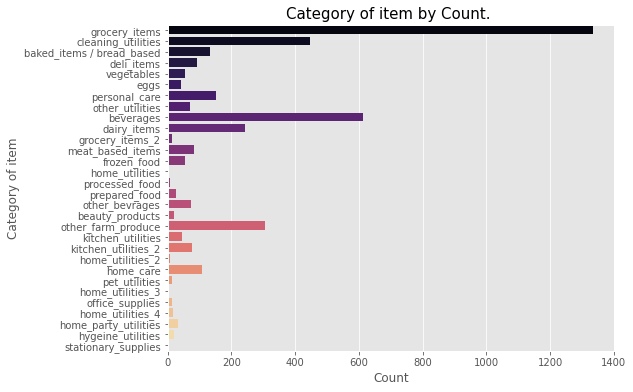

In [ ]:
## Types of various category of items and their count 

plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.countplot(y='category_of_item',data = item_details,palette='magma')
plt.ylabel('Category of item', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Category of item by Count. ', fontsize=15)
plt.show()

Top item categories are: 
1.   Grocery Items
2.   Beverages
3.   Cleaning Utilities 
4.   Other Farm Produce 
5.   Dairy Items            



In [ ]:
print(item_details['class'].value_counts())

class_1016    133
class_1040    110
class_1124    100
class_1034     98
class_1122     81
             ... 
class_1029      1
class_3116      1
class_2954      1
class_2784      1
class_6393      1
Name: class, Length: 337, dtype: int64


In [ ]:
print(item_details['perishable'].value_counts())

0    3114
1     986
Name: perishable, dtype: int64


In [ ]:
item_details['item_id'] = item_details['item_id'].astype('category')
item_details['category_of_item'] = item_details['category_of_item'].astype('category')
item_details['class'] = item_details['class'].astype('category')
item_details['perishable'] = item_details['perishable'].astype('category')

### Location Details

In [ ]:
location_details.head()

,location_id,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8
3,location_4,Bengaluru,Karnataka,D,9
4,location_5,Delhi,NCR,D,4


In [ ]:
## Number of unique stores/warehouse units.

location_details['location_id'].nunique()

54

Total Number of store/warehouse unit is -54 

### Number of store in each city. 

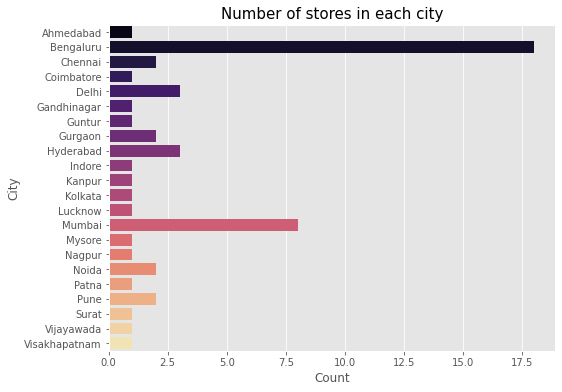

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.countplot(y='city',data = location_details.sort_values('city'),palette='magma')
plt.ylabel('City', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Number of stores in each city', fontsize=15)
plt.show()

Top cities with majority of the store units are:

1. Bengaluru        
2. Mumbai            
3. Hyderabad , Delhi         

### Number of store/unit in each state 

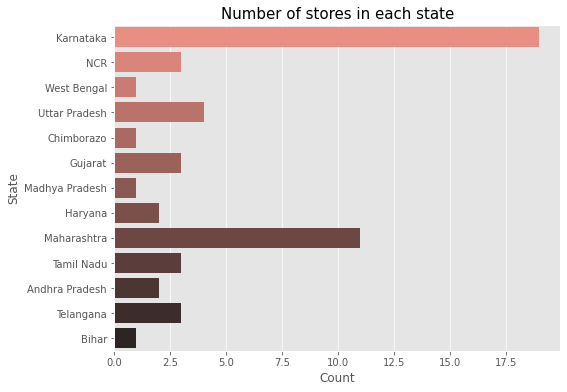

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.countplot(y='state',data = location_details,palette='dark:salmon_r')
plt.ylabel('State', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Number of stores in each state', fontsize=15)
plt.show()

Top States with majority of the store units are:

1. Karnataka         
2. Maharashtra       
3. Uttar Pradesh      
4. Telangana          
5. Tamil Nadu           

In [ ]:
location_details['type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

### Number of store/unit per cluster

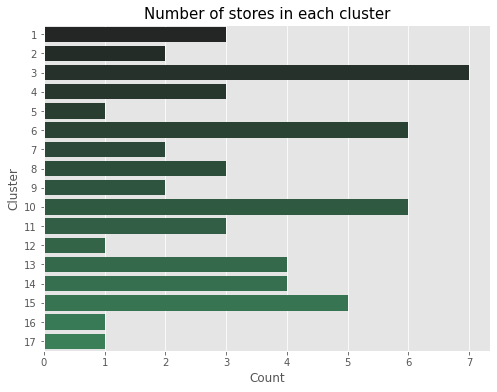

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.countplot(y='cluster',data = location_details,palette='dark:seagreen')
plt.ylabel('Cluster', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Number of stores in each cluster', fontsize=15)
plt.show()

3,6,10,15 are the top clusters with most stores 

In [ ]:
location_details['location_id'] = location_details['location_id'].astype('category')
location_details['city'] = location_details['city'].astype('category')
location_details['state'] = location_details['state'].astype('category')
location_details['type'] = location_details['type'].astype('category')
location_details['cluster'] = location_details['cluster'].astype('category')

# Exploratory Data Analysis

In [ ]:
train.head()

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,False
1,2015-01-01,location_25,item_105574,1.0,False
2,2015-01-01,location_25,item_105575,2.0,False
3,2015-01-01,location_25,item_108079,1.0,False
4,2015-01-01,location_25,item_108701,1.0,False


In [ ]:
train.unit_sales.describe()

count    1.016888e+08
mean     5.817145e+00
std      2.296099e+01
min     -1.537200e+04
25%      2.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      8.944000e+04
Name: unit_sales, dtype: float64

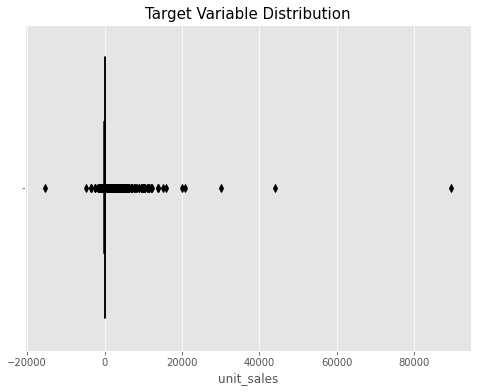

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.boxplot(train['unit_sales'],color = 'black')
plt.title('Target Variable Distribution', fontsize=15)
plt.show()

Our target variable contains some netative values. 

In [ ]:
# Closer look for at the negative unit sales. 

print(train[train.unit_sales < 0])


                date   locationId       item_id  unit_sales onpromotion
10655     2015-01-02  location_10   item_456875        -3.0       False
46867     2015-01-03   location_5   item_559044        -1.0       False
50970     2015-01-03   location_9   item_365138        -3.0       False
71807     2015-01-03  location_41   item_812716       -19.0       False
71992     2015-01-03  location_41  item_1004551       -27.0       False
...              ...          ...           ...         ...         ...
101574263 2018-12-30  location_51  item_1717134        -2.0       False
101587320 2018-12-31   location_4  item_1584293        -1.0       False
101612948 2018-12-31  location_18   item_376483        -1.0       False
101626331 2018-12-31  location_25   item_315463        -1.0       False
101672705 2018-12-31  location_47   item_864290       -31.0       False

[6162 rows x 5 columns]


Around 6000+ negative values in unit sales

In [ ]:
# Imputting negative values with zero 

train.loc[(train.unit_sales<0),'unit_sales'] = 0

## Sales variations over time 

In [ ]:
train['Year'] = pd.DatetimeIndex(train['date']).year.astype('int32')
train['Month'] = pd.DatetimeIndex(train['date']).month.astype('int8')
train['Day'] = pd.DatetimeIndex(train['date']).day.astype('int8')
train['Weekday'] = pd.DatetimeIndex(train['date']).weekday.astype('int8')

In [ ]:
train.head()

,date,locationId,item_id,unit_sales,onpromotion,Year,Month,Day,Weekday
0,2015-01-01,location_25,item_103665,7.0,False,2015,1,1,3
1,2015-01-01,location_25,item_105574,1.0,False,2015,1,1,3
2,2015-01-01,location_25,item_105575,2.0,False,2015,1,1,3
3,2015-01-01,location_25,item_108079,1.0,False,2015,1,1,3
4,2015-01-01,location_25,item_108701,1.0,False,2015,1,1,3


### Daily Sales Plot

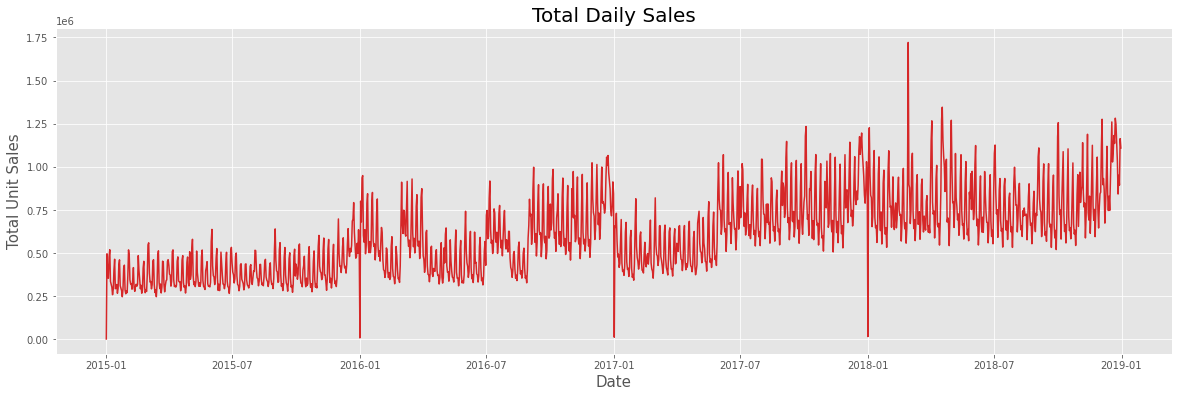

In [ ]:
daily_sales=train.groupby(['date'])['unit_sales'].sum().reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
sns.lineplot(daily_sales['date'],daily_sales['unit_sales'],color=color[3],)
plt.ylabel('Total Unit Sales', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('Total Daily Sales', fontsize=20)
plt.show()

### Day of the Week Sales Plot.

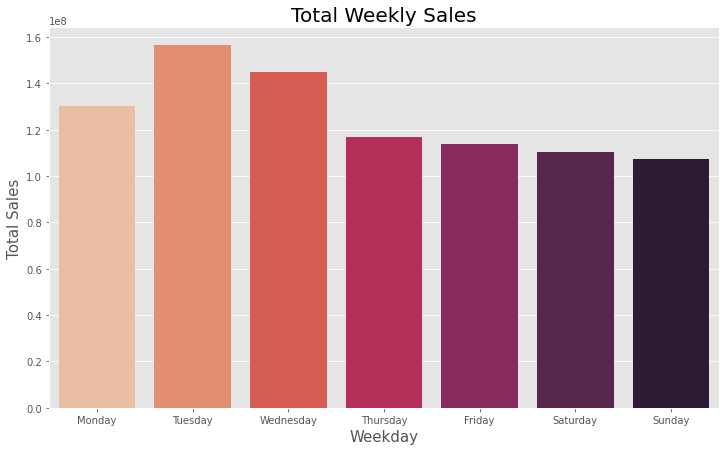

In [ ]:
wkly_sales = train.groupby(['Weekday'])['unit_sales'].sum().reset_index()

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.barplot(wkly_sales['Weekday'],wkly_sales['unit_sales'],palette="rocket_r",)
plt.ylabel('Total Sales', fontsize=15)
plt.xlabel('Weekday', fontsize=15)
plt.title('Total Weekly Sales', fontsize=20)
plt.xticks(wkly_sales['Weekday'],labels = days)
plt.show()

### Monthly Sales Plot

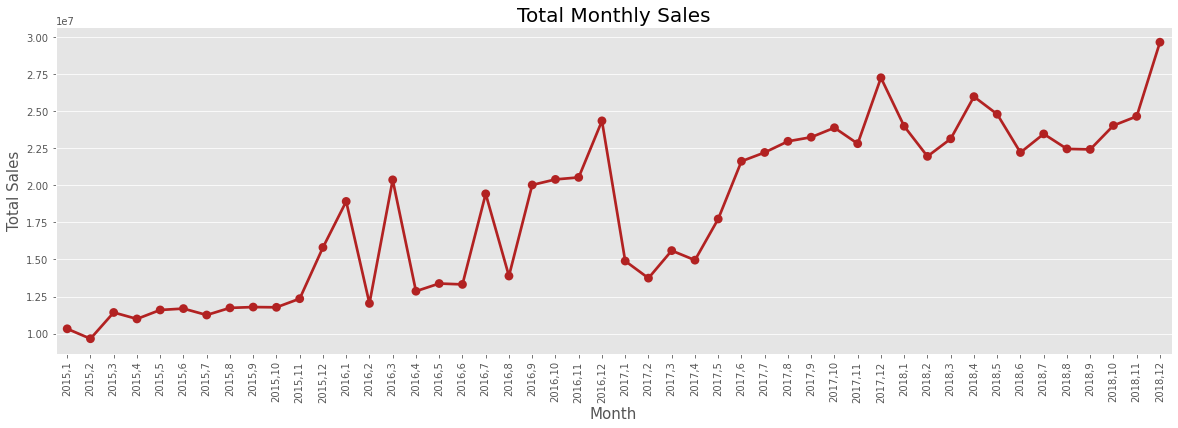

In [ ]:
monthly_sales=train.groupby(['Year','Month'])['unit_sales'].sum().reset_index()
monthly_sales["period"] = monthly_sales["Year"].astype(str) + "," + monthly_sales["Month"].astype(str)
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
sns.pointplot(monthly_sales['period'],monthly_sales['unit_sales'],color='firebrick',)
plt.ylabel('Total Sales', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.title('Total Monthly Sales', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

### Yearly Sales Plot

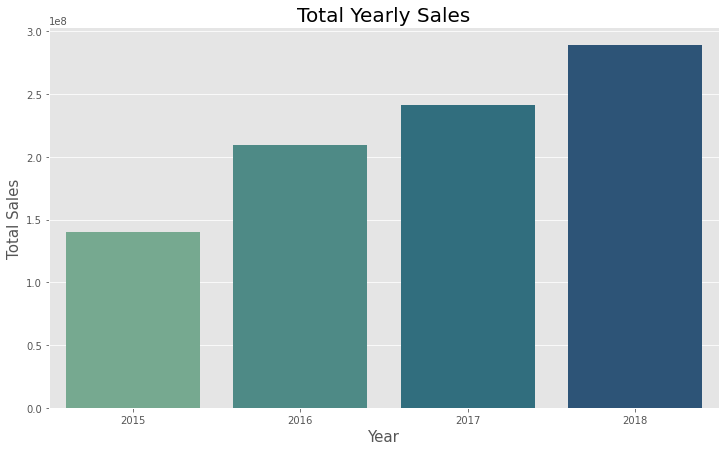

In [ ]:
yearly_sales= train.groupby(['Year'])['unit_sales'].sum().reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.barplot(yearly_sales['Year'],yearly_sales['unit_sales'],palette='crest')
plt.ylabel('Total Sales', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.title('Total Yearly Sales', fontsize=20)
plt.show()

### Daily Average Sales Plot

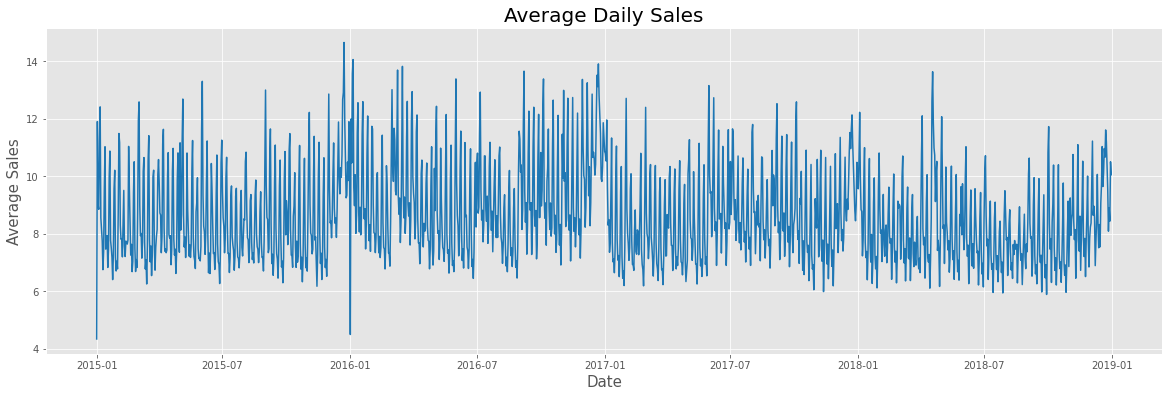

In [ ]:
daily_avg_sales=train.groupby(['date'])['unit_sales'].mean().reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
sns.lineplot(daily_avg_sales['date'],daily_avg_sales['unit_sales'],color=color[0],)
plt.ylabel('Average Sales', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('Average Daily Sales', fontsize=20)
plt.show()

### Day of the Week Average Sales Plot.

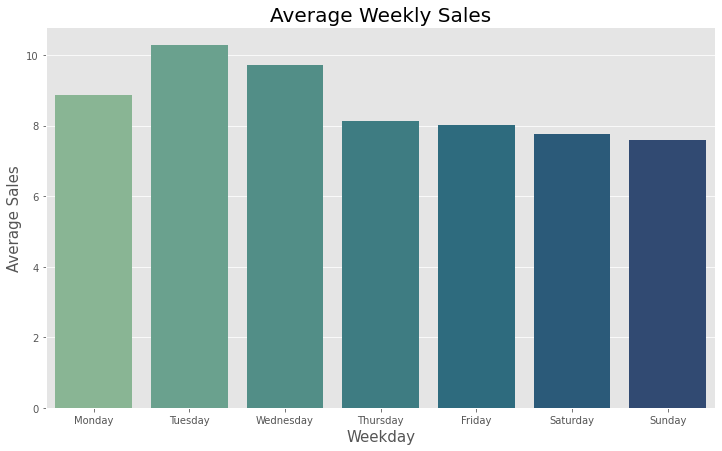

In [ ]:
wkly_avg_sales = train.groupby(['Weekday'])['unit_sales'].mean().reset_index()

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.barplot(wkly_avg_sales['Weekday'],wkly_avg_sales['unit_sales'],palette="crest",)
plt.ylabel('Average Sales', fontsize=15)
plt.xlabel('Weekday', fontsize=15)
plt.title('Average Weekly Sales', fontsize=20)
plt.xticks(wkly_avg_sales['Weekday'],labels = days)
plt.show()

### Monthly Average Sales Plot.

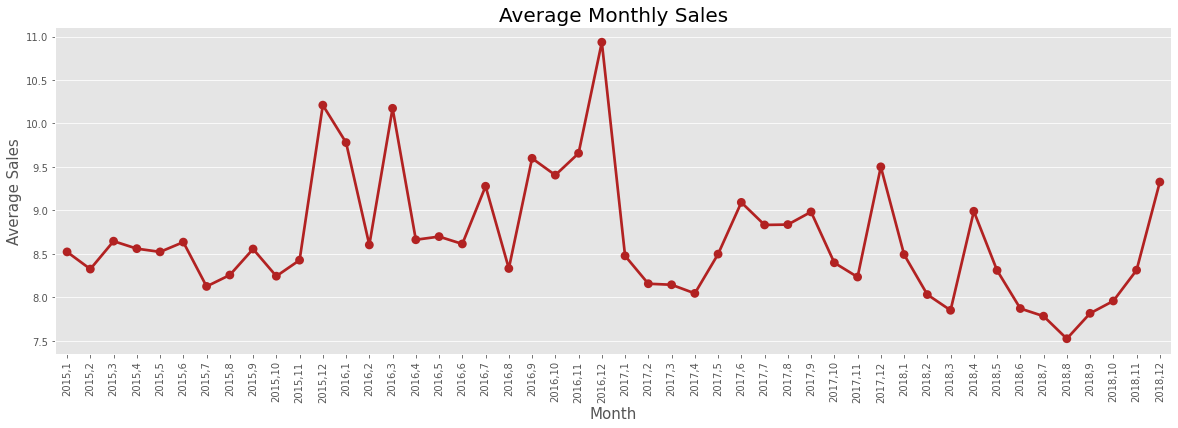

In [ ]:
monthly_avg_sales=train.groupby(['Year','Month'])['unit_sales'].mean().reset_index()
monthly_avg_sales["period"] = monthly_avg_sales["Year"].astype(str) + "," + monthly_avg_sales["Month"].astype(str)
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
sns.pointplot(monthly_avg_sales['period'],monthly_avg_sales['unit_sales'],color='firebrick',)
plt.ylabel('Average Sales', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.title('Average Monthly Sales', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

### Yearly Average Sales Plot.

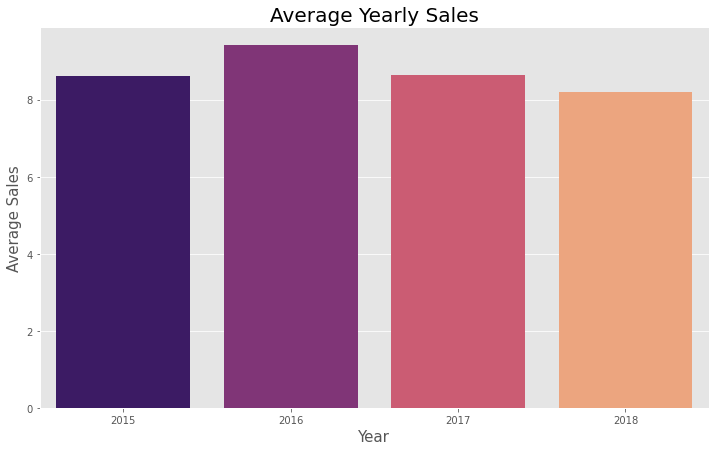

In [ ]:
yearly_avg_sales= train.groupby(['Year'])['unit_sales'].mean().reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.barplot(yearly_avg_sales['Year'],yearly_avg_sales['unit_sales'],palette='magma')
plt.ylabel('Average Sales', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.title('Average Yearly Sales', fontsize=20)
plt.show()

In [ ]:
## Freeing up some memory usage 

del daily_sales
del wkly_sales
del monthly_sales
del yearly_sales
del daily_avg_sales
del wkly_avg_sales
del monthly_avg_sales
del yearly_avg_sales

## Item Level Aggregation Data

In [ ]:
Train_item_data=train.groupby(['item_id'])['unit_sales'].sum().reset_index()
Train_item_data = Train_item_data.sort_values('unit_sales', ascending=False)

In [ ]:
Train_item_data.head()

,item_id,unit_sales
1497,item_1503844,4832384.5
74,item_1047679,4799156.0
3513,item_807493,4069313.0
2902,item_364606,3939808.0
1427,item_1473474,3865814.0


### Top 10 Selling Items by Total Sales.

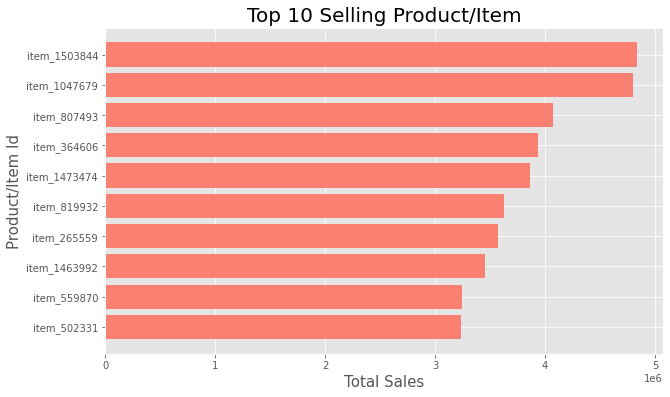

In [ ]:
item = Train_item_data[0:10].sort_values('unit_sales')

plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.barh('item_id','unit_sales',data = item,color = 'salmon')
plt.ylabel('Product/Item Id', fontsize=15)
plt.xlabel('Total Sales', fontsize=15)
plt.title('Top 10 Selling Product/Item', fontsize=20)
plt.show()

In [ ]:
item_details.head()

,item_id,category_of_item,class,perishable
0,item_96995,grocery_items,class_1093,0
1,item_99197,grocery_items,class_1067,0
2,item_103501,cleaning_utilities,class_3008,0
3,item_103520,grocery_items,class_1028,0
4,item_103665,baked_items / bread_based,class_2712,1


In [ ]:
## Merging train and item level data together, 

train_item_level_data = pd.merge(Train_item_data,item_details,how='left',on='item_id')

In [ ]:
train_item_level_data.head(10)

,item_id,unit_sales,category_of_item,class,perishable
0,item_1503844,4832384.5,other_farm_produce,class_2022,1
1,item_1047679,4799156.0,beverages,class_1120,0
2,item_807493,4069313.0,beverages,class_1124,0
3,item_364606,3939808.0,grocery_items,class_1014,0
4,item_1473474,3865814.0,other_farm_produce,class_2014,1
5,item_819932,3623335.0,beverages,class_1122,0
6,item_265559,3573672.0,grocery_items,class_1072,0
7,item_1463992,3450733.0,beverages,class_1144,0
8,item_559870,3249472.0,grocery_items,class_1072,0
9,item_502331,3240415.0,baked_items / bread_based,class_2702,1


### Top 10 'class' of product 

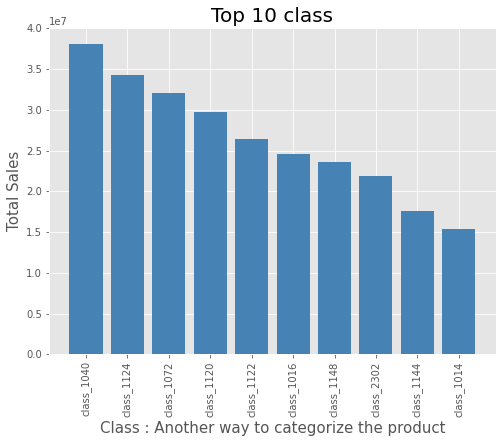

In [ ]:
temp = train_item_level_data.groupby(['class'])['unit_sales'].sum().reset_index()
temp = temp.sort_values('unit_sales', ascending=False).head(10)

plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.bar(temp['class'],temp['unit_sales'],color='steelblue')
plt.ylabel('Total Sales', fontsize=15)
plt.xlabel('Class : Another way to categorize the product', fontsize=15)
plt.title('Top 10 class', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

### Top Selling Category Of Item.

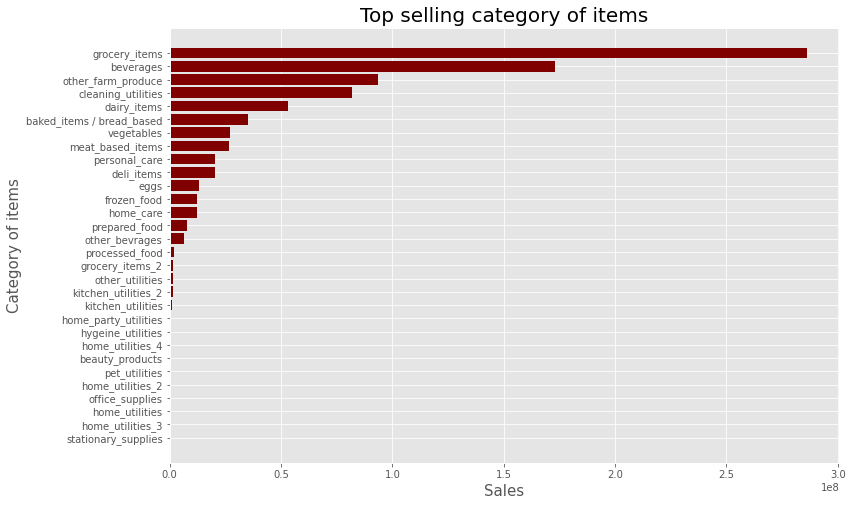

In [ ]:
temp1 = train_item_level_data.groupby(['category_of_item'])['unit_sales'].sum().reset_index()
temp1 = temp1.sort_values(by='unit_sales')

plt.figure(figsize=(12,8))
plt.barh(temp1['category_of_item'],temp1['unit_sales'],color='maroon')
plt.ylabel('Category of items', fontsize=15)
plt.xlabel('Sales', fontsize=15)
plt.title('Top selling category of items', fontsize=20)
plt.show()

### Distribution for Perishable Products. 

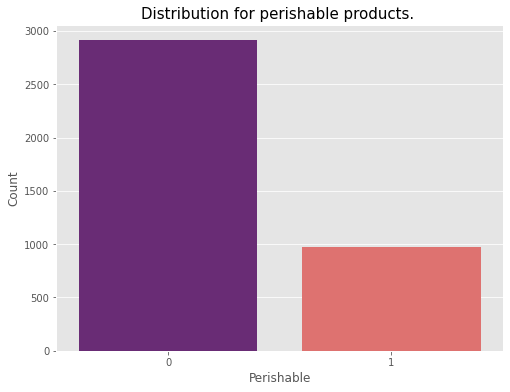

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.countplot('perishable',data = train_item_level_data,palette='magma')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Perishable', fontsize=12)
plt.title('Distribution for perishable products. ', fontsize=15)
plt.show()

### Top perishable product categories.

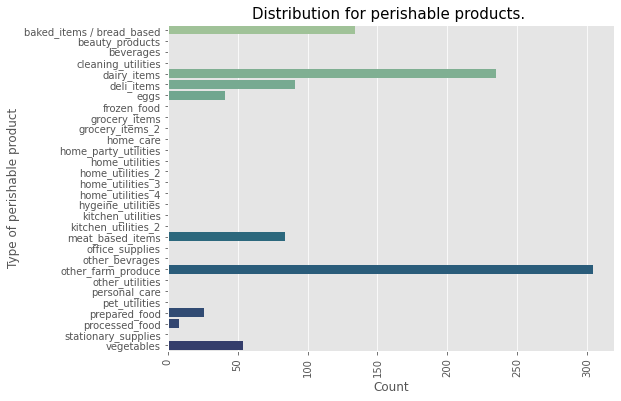

In [ ]:
perishable = train_item_level_data[train_item_level_data.perishable == 1]
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
sns.countplot(y='category_of_item',data = perishable,palette='crest')
plt.ylabel('Type of perishable product', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Distribution for perishable products. ', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Top 5 Perishable Foods are 

1. Other Farm Produce 
2. Dairy Items 
3. Baked Items / Bread Based 
4. Deli Items 
5. Meat Based Items

## Location and Transaction Level Aggregation Data.

In [ ]:
location_details.head()

,location_id,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8
3,location_4,Bengaluru,Karnataka,D,9
4,location_5,Delhi,NCR,D,4


In [ ]:
train_transactions.head()

,date,location_identifier,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358
3,2015-01-02,location_3,3487
4,2015-01-02,location_4,1922


In [ ]:
train_transactions = train_transactions.rename(columns={'location_identifier':'location_id'})

In [ ]:
train.head()

,date,locationId,item_id,unit_sales,onpromotion,Year,Month,Day,Weekday
0,2015-01-01,location_25,item_103665,7.0,False,2015,1,1,3
1,2015-01-01,location_25,item_105574,1.0,False,2015,1,1,3
2,2015-01-01,location_25,item_105575,2.0,False,2015,1,1,3
3,2015-01-01,location_25,item_108079,1.0,False,2015,1,1,3
4,2015-01-01,location_25,item_108701,1.0,False,2015,1,1,3


In [ ]:
train_location_level_data = train.groupby(['locationId'])['unit_sales'].sum().reset_index()
train_location_level_data = train_location_level_data.rename(columns={'locationId':'location_id','unit_sales':'total_unit_sales'})
train_location_level_data.head()

,location_id,total_unit_sales
0,location_1,11710016.0
1,location_10,8151892.0
2,location_11,23702084.0
3,location_12,8865465.0
4,location_13,8948828.0


## Transaction - Level - Analysis 

### Daily Total Transaction Plot.

In [ ]:
train_transactions.head()

,date,location_id,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358
3,2015-01-02,location_3,3487
4,2015-01-02,location_4,1922


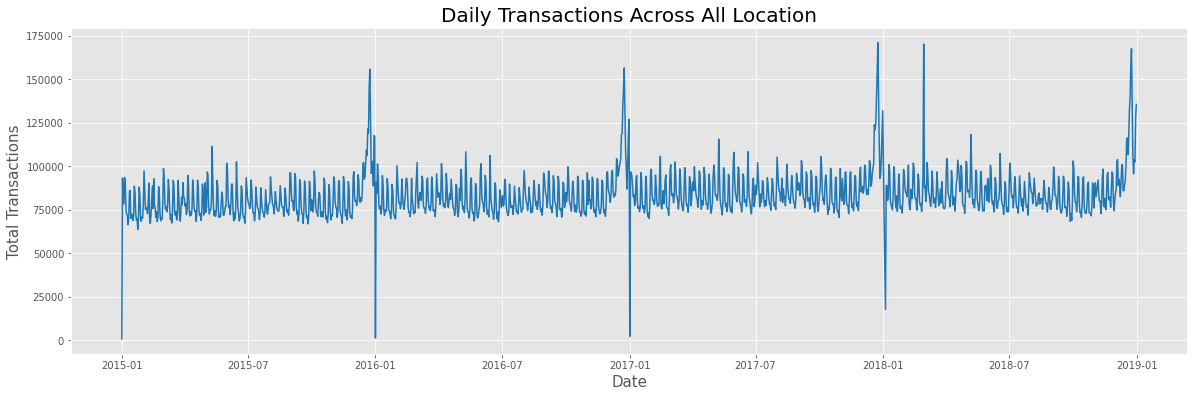

In [ ]:
loc =  train_transactions.groupby(['date'])['transactions'].sum().reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
sns.lineplot(loc['date'],loc['transactions'],color=color[0],)
plt.ylabel('Total Transactions', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('Daily Transactions Across All Location', fontsize=20)
plt.show()

In [ ]:
loc.head()

,date,transactions
0,2015-01-01,770
1,2015-01-02,93215
2,2015-01-03,78504
3,2015-01-04,78494
4,2015-01-05,93573


In [ ]:
loc['Year'] = pd.DatetimeIndex(loc['date']).year.astype('int32')
loc['Month'] = pd.DatetimeIndex(loc['date']).month.astype('int8')
loc['Weekday'] = pd.DatetimeIndex(loc['date']).weekday.astype('int8')

In [ ]:
loc.head()

,date,transactions,Year,Month,Weekday
0,2015-01-01,770,2015,1,3
1,2015-01-02,93215,2015,1,4
2,2015-01-03,78504,2015,1,5
3,2015-01-04,78494,2015,1,6
4,2015-01-05,93573,2015,1,0


### Weekly Total Transaction Plot.

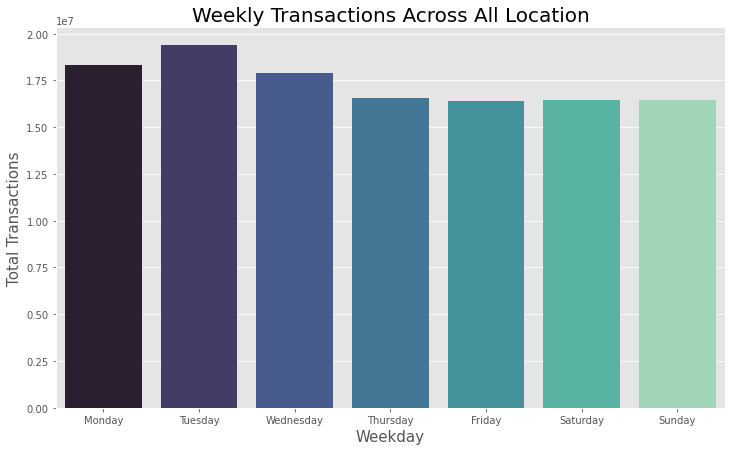

In [ ]:
loc2 = loc.groupby(['Weekday'])['transactions'].sum().reset_index()

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.barplot(loc2['Weekday'],loc2['transactions'],palette="mako",)
plt.ylabel('Total Transactions', fontsize=15)
plt.xlabel('Weekday', fontsize=15)
plt.title('Weekly Transactions Across All Location', fontsize=20)
plt.xticks(loc2['Weekday'],labels = days)
plt.show()

### Monthly Total Transaction Plot. 

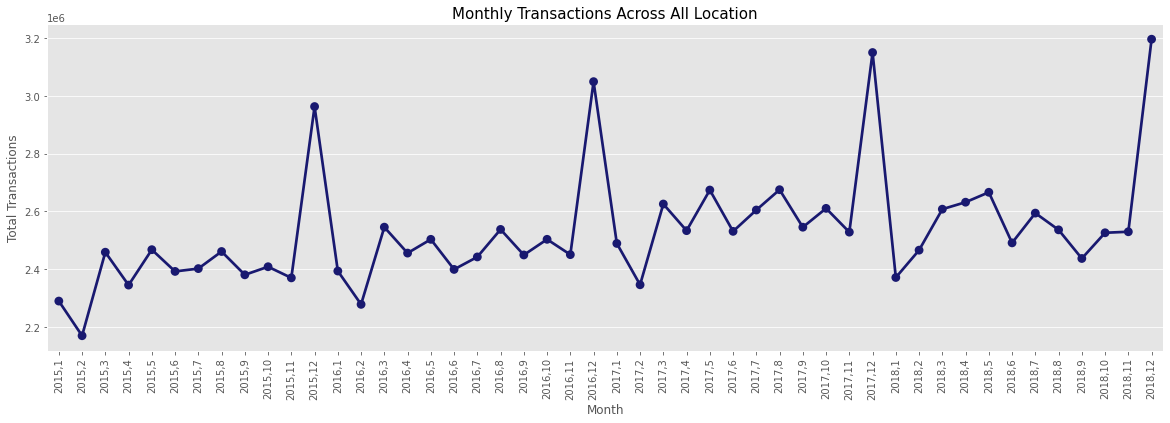

In [ ]:
loc3 =loc.groupby(['Year','Month'])['transactions'].sum().reset_index()
loc3["period"] = loc3["Year"].astype(str) + "," + loc3["Month"].astype(str)
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
sns.pointplot(loc3['period'],loc3['transactions'],color='midnightblue')
plt.ylabel('Total Transactions', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Monthly Transactions Across All Location', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Yearly Total Transaction Plot.

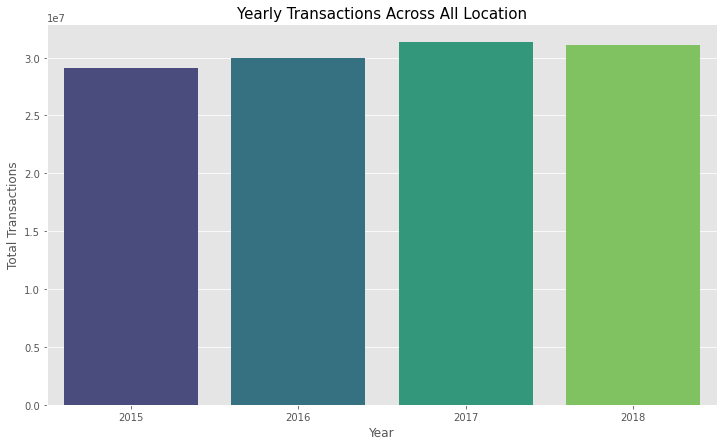

In [ ]:
loc4 =loc.groupby(['Year'])['transactions'].sum().reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.barplot(loc4['Year'],loc4['transactions'],palette='viridis')
plt.ylabel('Total Transactions', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Yearly Transactions Across All Location', fontsize=15)
plt.show()

## Transaction - Location - Level - Analysis

In [ ]:
train_transactions.head()

,date,location_id,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358
3,2015-01-02,location_3,3487
4,2015-01-02,location_4,1922


In [ ]:
location_details.head()

,location_id,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8
3,location_4,Bengaluru,Karnataka,D,9
4,location_5,Delhi,NCR,D,4


In [ ]:
train_location_based_transaction_data = train_transactions.groupby(['location_id'])['transactions'].sum().reset_index()
train_location_based_transaction_data = train_location_based_transaction_data.sort_values('transactions', ascending=False)
train_location_based_transaction_data.head(10)

,location_id,transactions
38,location_44,6284747
41,location_47,5657019
39,location_45,5333927
40,location_46,5194896
22,location_3,4647042
42,location_48,4442404
51,location_8,4025880
43,location_49,3877586
45,location_50,3792608
2,location_11,3447047


### Top 10 Store Location by Total Transactions 

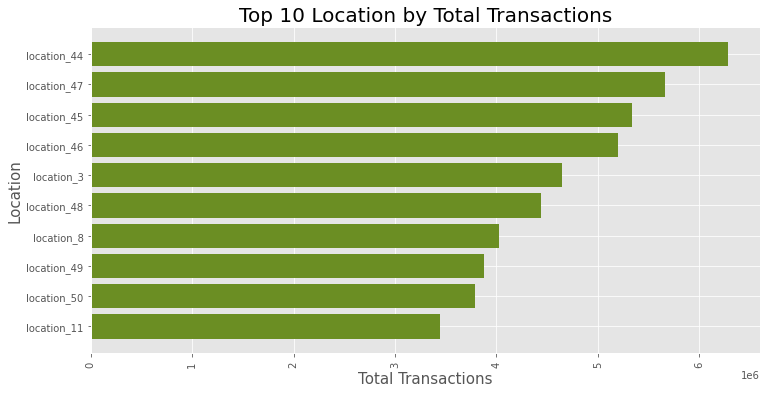

In [ ]:
loc = train_location_based_transaction_data.head(10).sort_values(by='transactions')
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.barh('location_id','transactions',data = loc,color='olivedrab')
plt.xlabel('Total Transactions', fontsize=15)
plt.ylabel('Location', fontsize=15)
plt.title('Top 10 Location by Total Transactions', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
location_based_transaction_data = pd.merge(train_location_based_transaction_data,location_details,how='left',on='location_id')
location_based_transaction_data.head(10)

,location_id,transactions,city,state,type,cluster
0,location_44,6284747,Bengaluru,Karnataka,A,5
1,location_47,5657019,Bengaluru,Karnataka,A,14
2,location_45,5333927,Bengaluru,Karnataka,A,11
3,location_46,5194896,Bengaluru,Karnataka,A,14
4,location_3,4647042,Bengaluru,Karnataka,D,8
5,location_48,4442404,Bengaluru,Karnataka,A,14
6,location_8,4025880,Bengaluru,Karnataka,D,8
7,location_49,3877586,Bengaluru,Karnataka,A,11
8,location_50,3792608,Gurgaon,Haryana,A,14
9,location_11,3447047,Kolkata,West Bengal,B,6


### Cities with highest total transactions.

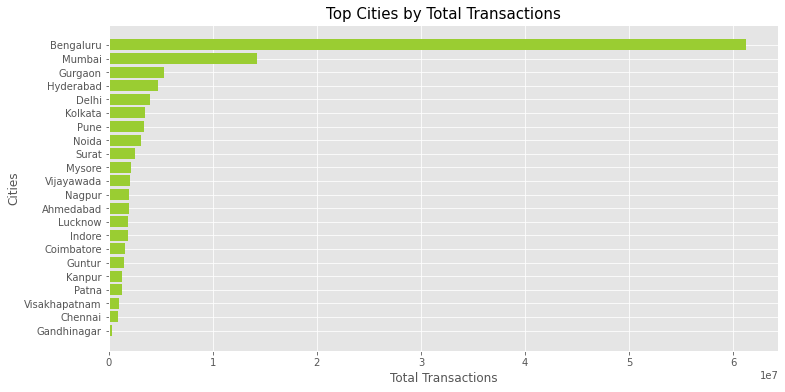

In [ ]:
loc101 = location_based_transaction_data.groupby(['city'])['transactions'].sum().reset_index()
loc101 = loc101.sort_values(by='transactions')
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.barh('city','transactions',data = loc101,color='yellowgreen')
plt.xlabel('Total Transactions', fontsize=12)
plt.ylabel('Cities', fontsize=12)
plt.title('Top Cities by Total Transactions', fontsize=15)
plt.show()

### States with highest total transactions.

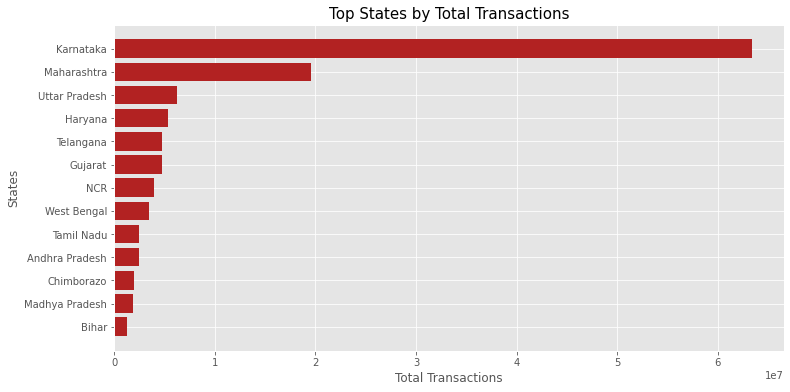

In [ ]:
loc102 = location_based_transaction_data.groupby(['state'])['transactions'].sum().reset_index()
loc102 = loc102.sort_values(by='transactions')
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.barh('state','transactions',data = loc102,color='firebrick')
plt.xlabel('Total Transactions', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.title('Top States by Total Transactions', fontsize=15)
plt.show()

### Top Business Unit by Total Transactions

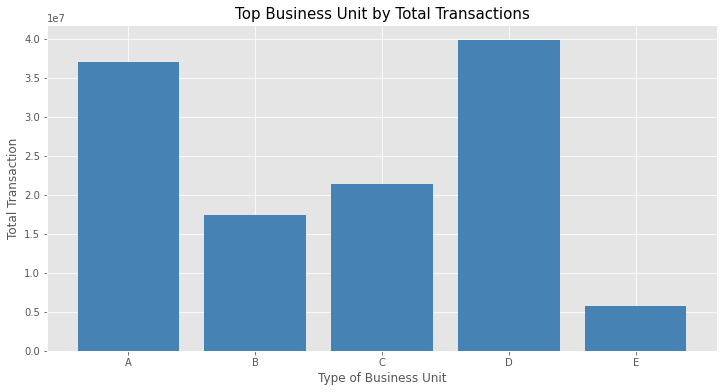

In [ ]:
loc103 = location_based_transaction_data.groupby(['type'])['transactions'].sum().reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.bar('type','transactions',data = loc103,color='steelblue')
plt.xlabel('Type of Business Unit', fontsize=12)
plt.ylabel('Total Transaction', fontsize=12)
plt.title('Top Business Unit by Total Transactions', fontsize=15)
plt.show()

### Top Cluster Unit by Total Transactions

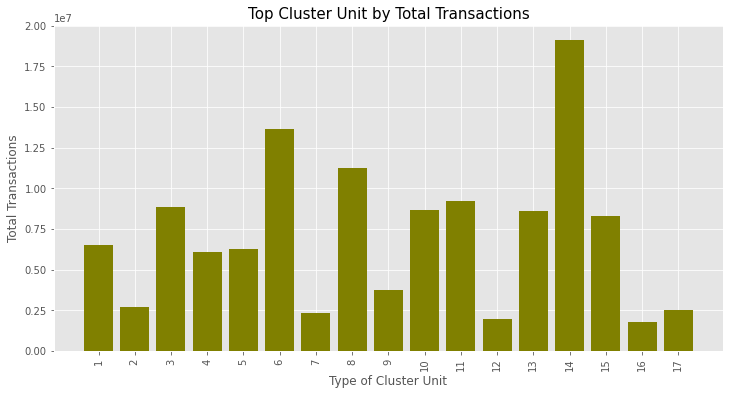

In [ ]:
loc104 = location_based_transaction_data.groupby(['cluster'])['transactions'].sum().reset_index()
labels = loc104['cluster']
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.bar('cluster','transactions',data = loc104,color = 'olive')
plt.xlabel('Type of Cluster Unit', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.title('Top Cluster Unit by Total Transactions', fontsize=15)
plt.xticks(loc104['cluster'],labels,rotation= 'vertical')
plt.show()

#### Freeing up some space

In [ ]:
#del loc
del loc2
del loc3
del loc4
del loc101
del loc102
del loc103
del loc104

## Location - Unitsales - Level - Analysis

In [ ]:
location_based_sales_data = train.groupby(['locationId'])['unit_sales'].sum().reset_index()

location_based_sales_data.head()

,locationId,unit_sales
0,location_1,11710016.0
1,location_10,8151892.0
2,location_11,23702084.0
3,location_12,8865465.0
4,location_13,8948828.0


In [ ]:
location_based_sales_data = location_based_sales_data.sort_values('unit_sales', ascending=False)
location_based_sales_data.head(10)

,locationId,unit_sales
38,location_44,51601564.0
39,location_45,44844808.0
41,location_47,41881040.0
22,location_3,41771644.0
43,location_49,35040484.0
40,location_46,34665080.0
42,location_48,29917382.0
46,location_51,27548136.0
51,location_8,25245712.0
45,location_50,23739282.0


### Top 10 Store location by Total Unit Sales

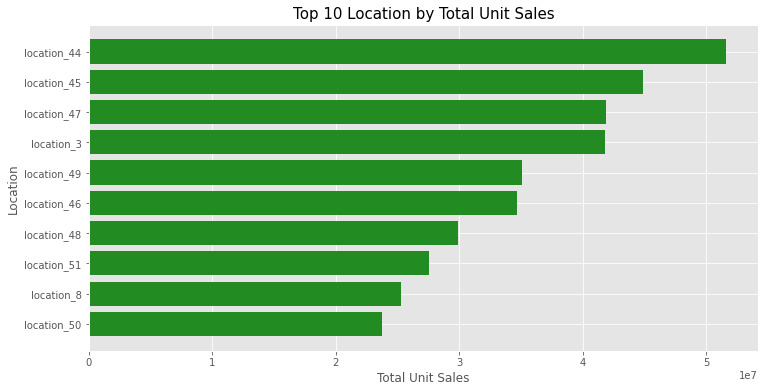

In [ ]:
loc82 = location_based_sales_data.head(10).sort_values(by='unit_sales')
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.barh('locationId','unit_sales',data =loc82,color='forestgreen')
plt.xlabel('Total Unit Sales', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.title('Top 10 Location by Total Unit Sales', fontsize=15)
plt.show()

In [ ]:
location_based_sales_data.head()

,locationId,unit_sales
38,location_44,51601564.0
39,location_45,44844808.0
41,location_47,41881040.0
22,location_3,41771644.0
43,location_49,35040484.0


In [ ]:
location_based_sales_data = location_based_sales_data.rename(columns={'locationId':'location_id'})
location_based_unitsales_data = pd.merge(location_based_sales_data,location_details,how='left',on='location_id')
location_based_unitsales_data.head(10)

,location_id,unit_sales,city,state,type,cluster
0,location_44,51601564.0,Bengaluru,Karnataka,A,5
1,location_45,44844808.0,Bengaluru,Karnataka,A,11
2,location_47,41881040.0,Bengaluru,Karnataka,A,14
3,location_3,41771644.0,Bengaluru,Karnataka,D,8
4,location_49,35040484.0,Bengaluru,Karnataka,A,11
5,location_46,34665080.0,Bengaluru,Karnataka,A,14
6,location_48,29917382.0,Bengaluru,Karnataka,A,14
7,location_51,27548136.0,Mumbai,Maharashtra,A,17
8,location_8,25245712.0,Bengaluru,Karnataka,D,8
9,location_50,23739282.0,Gurgaon,Haryana,A,14


### Cities with Highest Total Unit Sales.

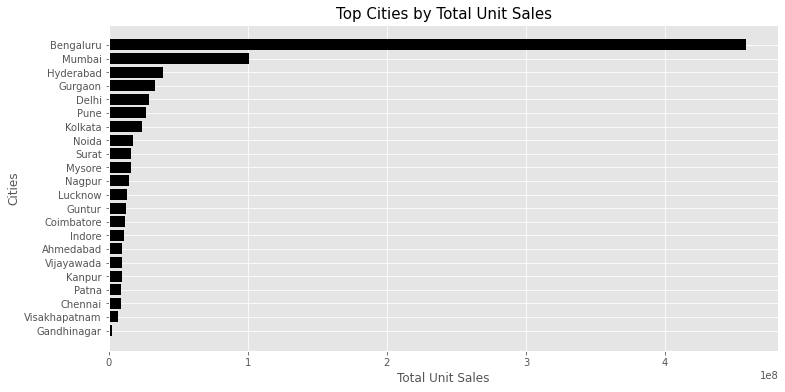

In [ ]:
loc101 = location_based_unitsales_data.groupby(['city'])['unit_sales'].sum().reset_index()
loc101 = loc101.sort_values(by='unit_sales')
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.barh('city','unit_sales',data = loc101,color='black')
plt.xlabel('Total Unit Sales', fontsize=12)
plt.ylabel('Cities', fontsize=12)
plt.title('Top Cities by Total Unit Sales', fontsize=15)
plt.show()

### States With Highest Total Unit Sales.

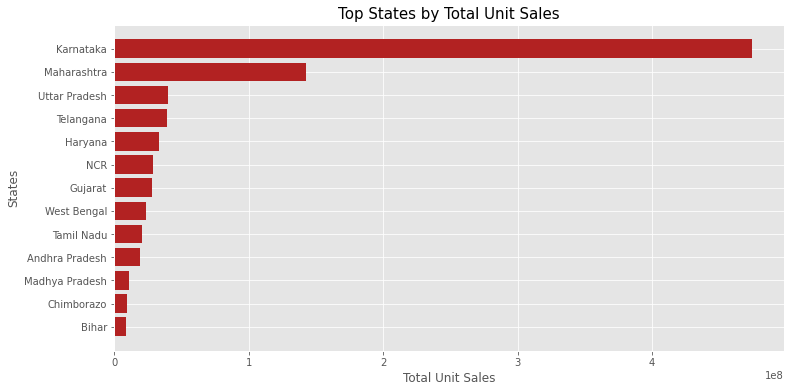

In [ ]:
loc102 = location_based_unitsales_data.groupby(['state'])['unit_sales'].sum().reset_index()
loc102 = loc102.sort_values(by='unit_sales')
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.barh('state','unit_sales',data = loc102,color='firebrick')
plt.xlabel('Total Unit Sales', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.title('Top States by Total Unit Sales', fontsize=15)
plt.show()

### Top Business Unit by Total Unit Sales

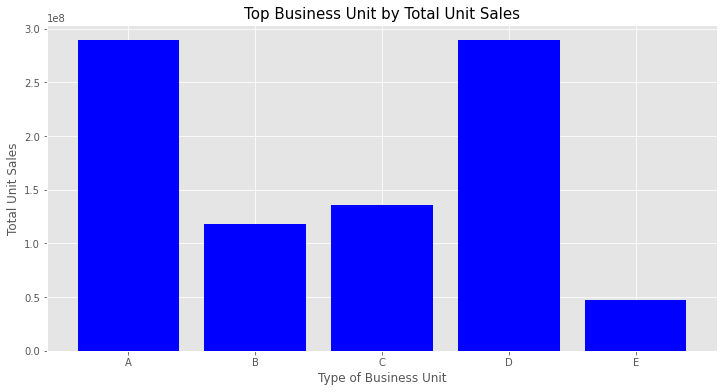

In [ ]:
loc103 = location_based_unitsales_data.groupby(['type'])['unit_sales'].sum().reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.bar('type','unit_sales',data = loc103,color='blue')
plt.xlabel('Type of Business Unit', fontsize=12)
plt.ylabel('Total Unit Sales', fontsize=12)
plt.title('Top Business Unit by Total Unit Sales', fontsize=15)
plt.show()

### Top Cluster Units by Total Unit Sales

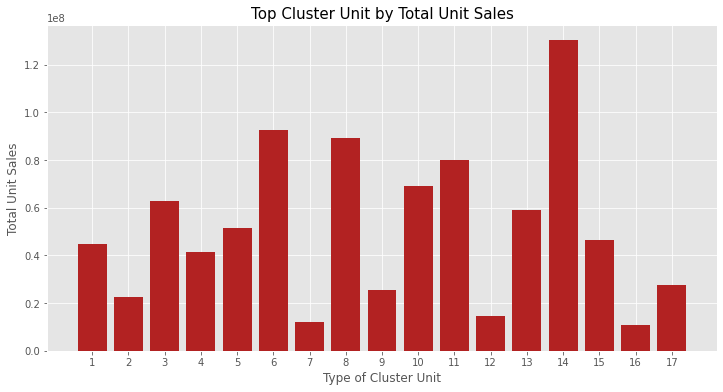

In [ ]:
loc104 = location_based_unitsales_data.groupby(['cluster'])['unit_sales'].sum().reset_index()
labels = loc104['cluster']
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.bar('cluster','unit_sales',data = loc104,color='firebrick')
plt.xlabel('Type of Cluster Unit', fontsize=12)
plt.ylabel('Total Unit Sales', fontsize=12)
plt.title('Top Cluster Unit by Total Unit Sales', fontsize=15)
plt.xticks(loc104['cluster'],labels)
plt.show()

--------------------------------------------END-------------------------------------------------------------